In [95]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly as ply
import seaborn as sns
from sklearn.model_selection import train_test_split

In [96]:
file_name = "/Users/ellenxiao/Documents/Projects/Cervical Cancer/risk_factors_cervical_cancer.csv"
df = pd.read_csv(file_name, encoding="ISO-8859-1")
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


## I. Data Preprocessing

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [98]:
print('Number of Rows: ',df.shape[0])
print('Number of Columns: ', df.shape[1])
print('Features: \n', df.columns.tolist())
print('Unique values: \n', df.nunique())

Number of Rows:  858
Number of Columns:  36
Features: 
 ['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD', 'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis', 'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis', 'STDs:pelvic inflammatory disease', 'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis', 'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology', 'Biopsy']
Unique values: 
 Age                                   44
Number of sexual partners             13
First sexual intercourse              22
Num of pregnancies                    12
Smokes                                 3
S

In [99]:
df.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 1. Missing values

In [100]:
df[df=='?'].count()

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

There are 787 missing values in STDs: Time since first diagnosis and STDs: Time since last diagnosis. I have to drop it. 

In [101]:
df.drop(['STDs: Time since first diagnosis','STDs: Time since last diagnosis'],inplace=True,axis=1)

#### 1.1 Handle size less than 100 NaN values
I will fill features that have less than 100 NaN values with median values. Median values won't change characteristic of features.

In [102]:
df = df.replace('?',np.NaN)
df = df.apply(pd.to_numeric,axis=0) #convert to numerical

In [103]:
def fill_val(feature):
    df[feature].fillna(df[feature].median(),inplace=True)
fill_val('First sexual intercourse')
fill_val('Num of pregnancies')
fill_val('Number of sexual partners')

In [104]:
def smoke(feature):
    if feature == 'Smokes':
        df[feature].fillna(0,inplace=True)
    else:
        smokes = (df['Smokes']==1)
        df.loc[smokes,feature] = df.loc[smokes,feature].fillna(df.loc[smokes,feature].median())
        nosmokes = (df['Smokes']==0)
        df.loc[nosmokes,feature] = df.loc[nosmokes,feature].fillna(0)
smoke('Smokes')
smoke('Smokes (years)')
smoke('Smokes (packs/year)')

#### 1.2 Hormonal Contraceptives
There are 108 missing values in HC. We can fill NaN values with correlated features.

In [105]:
df_data = df.drop(['Hinselmann','Schiller','Citology','Biopsy'], axis = 1)

In [106]:
df_corr = df_data.drop(['STDs:condylomatosis', 'STDs:cervical condylomatosis', 
                   'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis', 
                   'STDs:pelvic inflammatory disease', 'STDs:genital herpes', 'STDs:molluscum contagiosum', 
                   'STDs:AIDS', 'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV'],axis=1)

In [107]:
df_corr = df_corr.dropna()

In [108]:
df_corr = df_corr.corr()

In [109]:
corr = go.Heatmap(x=df_corr.columns,y=df_corr.columns,z=df_corr,type='heatmap',colorscale='Viridis')
data = [corr]
fig = go.Figure(data=data)
fig.show()

From the correlation heatmap above, taking HC has a slightly relationship with the number of pregnancies. 

In [110]:
preg = (df['Num of pregnancies']<df['Num of pregnancies'].mean())
df.loc[preg,'Hormonal Contraceptives'] = df.loc[preg,'Hormonal Contraceptives'].fillna(1)
df['Hormonal Contraceptives'].fillna(0,inplace=True)
hc = (df['Hormonal Contraceptives']==1)
df.loc[hc,'Hormonal Contraceptives (years)'] = df.loc[hc,'Hormonal Contraceptives (years)'].fillna(df['Hormonal Contraceptives (years)'].median())
hc = (df['Hormonal Contraceptives']==0)
df.loc[hc,'Hormonal Contraceptives (years)'] = df.loc[hc,'Hormonal Contraceptives (years)'].fillna(0)

#### 1.3 IUD

The above heatmap shows that age and number of pregnancies have relationships with IUD

In [111]:
age = (df['Age']>df['Age'].mean())
df.loc[age,'IUD'] = df.loc[age,'IUD'].fillna(1)
df.loc[preg,'IUD'] = df.loc[preg,'IUD'].fillna(1)
df['IUD'].fillna(0,inplace=True)
iud = (df['IUD']==1)
df.loc[iud,'IUD (years)'] = df.loc[iud,'IUD (years)'].fillna(df['IUD (years)'].median())
iud = (df['IUD']==0)
df.loc[iud,'IUD (years)'] = df.loc[iud,'IUD (years)'].fillna(0)

#### 1.4 STDs
The above heatmap shows that smoke and IUD somehow have something to do with STDs. However, I could not find a significant patterns between smoke, IUD and STDs. Since over 100 missing values or wrong values can affect data, I would rather drop them.

In [112]:
df.dropna(inplace=True)

#### 1.5 Dx
Dx is not clearly explained in the dataset discription.

In [113]:
df.drop(['Dx:Cancer','Dx:CIN','Dx:HPV'],axis=1,inplace=True)

#### 1.6 Target
I will combine all four results to one, i.e., the results based on whatever methods the patients take.

In [114]:
df['target'] = df.apply(lambda row: 1 if (row['Hinselmann']+row['Schiller']+row['Citology']+row['Biopsy'])>=1 else 0, axis=1)

In [115]:
df_copy = df.copy()
df.drop(['Hinselmann','Schiller','Citology','Biopsy'],axis=1,inplace=True)
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx,target
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
2,34,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0


### 2. Create Features
I create some features that may have insights and can interpret better

In [116]:
# percentage of smoke year
df['Smokes (year/age)'] = round(df['Smokes (years)']/df['Age'],3)
# percentage Hormonal Contraceptive of years after first sexual intercourse
df['Hormonal Contraceptives (year/after first intercourse)'] = round(df['Hormonal Contraceptives (years)']/(df['Age']-df['First sexual intercourse']),3)
# percentage IUD of years after first sexual intercourse
df['IUD (year/after first intercourse)'] = round(df['IUD (years)']/(df['Age']-df['First sexual intercourse']),3)
# total packs smokes
df['Smokes (packs)'] = df['Smokes (packs/year)']*df['Smokes (years)']

In [117]:
pd.set_option('use_inf_as_na', True)

In [118]:
# Because we have Age = First Sexual Intercourse
df['Hormonal Contraceptives (year/after first intercourse)']=df['Hormonal Contraceptives (year/after first intercourse)'].fillna(0.000)
df['IUD (year/after first intercourse)']=df['IUD (year/after first intercourse)'].fillna(0.000)

In [119]:
# convert float to int
for col in df.columns:
    if col not in ['Smokes (year/age)','Hormonal Contraceptives (year/after first intercourse)','IUD (year/after first intercourse)']:
        df[col] = df[col].astype(int)
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx,target,Smokes (year/age),Hormonal Contraceptives (year/after first intercourse),IUD (year/after first intercourse),Smokes (packs)
0,18,4,15,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000,0.000,0.0,0
1,15,1,14,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000,0.000,0.0,0
2,34,1,17,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000,0.000,0.0,0
3,52,5,16,4,1,37,37,1,3,0,...,0,0,0,0,0,0,0.712,0.083,0.0,1369
4,46,3,21,4,0,0,0,1,15,0,...,0,0,0,0,0,0,0.000,0.600,0.0,0


## II. Data Visualization

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 753 entries, 0 to 857
Data columns (total 32 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Age                                                     753 non-null    int64  
 1   Number of sexual partners                               753 non-null    int64  
 2   First sexual intercourse                                753 non-null    int64  
 3   Num of pregnancies                                      753 non-null    int64  
 4   Smokes                                                  753 non-null    int64  
 5   Smokes (years)                                          753 non-null    int64  
 6   Smokes (packs/year)                                     753 non-null    int64  
 7   Hormonal Contraceptives                                 753 non-null    int64  
 8   Hormonal Contraceptives (years)         

In [121]:
# add_trace function
def add_bar(feature,row,col):
    
    sub_df = pd.DataFrame(df.groupby(by=['target',feature],as_index=False)['Dx'].count())
    fig.add_trace(go.Bar(x=sub_df.loc[sub_df['target']==0][feature],
                     y=sub_df.loc[sub_df['target']==0]['Dx'],
                     name='No Disease',marker_color='lightblue'),row=row, col=col)
    fig.add_trace(go.Bar(x=sub_df.loc[sub_df['target']==1][feature],
                     y=sub_df.loc[sub_df['target']==1]['Dx'],
                     name='Diseae',marker_color='lightpink'),row=row, col=col)

In [122]:
fig = make_subplots(
                    rows=2, cols=2,
                    subplot_titles=('Smokes and Cervical Cancer',
                                    'Hormonal Contraceptives and Cervical Cancer',
                                    'IUD and Cervical Cancer',
                                    'STDs and Cervical Cancer'))

add_bar('Smokes',1,1)
add_bar('Hormonal Contraceptives',1,2)
add_bar('IUD',2,1)
add_bar('STDs',2,2)

fig.update_layout(height=800, width=900, title_text="")
fig.show()

From the above graph, Hormonal Contraceptives feature is quite outstanding. Among people have cervical cancer, 2/3 of than took Hormonal Contraceptives. This can be an important key feature. On the other hand, over half of women takes hormonal contraceptives, this is also can make the number of people who has cervical cancer be greater than other features.

In [123]:
partner_df = pd.DataFrame(df.groupby(by=['target','Number of sexual partners'],as_index=False)['Dx'].count())
partner_df_y = partner_df.loc[partner_df['target']==1]

preg_df = pd.DataFrame(df.groupby(by=['target','Num of pregnancies'],as_index=False)['Dx'].count())
preg_df_y = preg_df.loc[preg_df['target']==1]

In [124]:
# add_trace function
def add_bar2(feature,row,col,color):
    sub_df = pd.DataFrame(df.groupby(by=['target',feature],as_index=False)['Dx'].count())
    sub_df_y = sub_df.loc[sub_df['target']==1]
    fig.add_trace(go.Bar(x=sub_df_y.loc[sub_df_y['target']==1][feature],
                     y=sub_df_y.loc[sub_df_y['target']==1]['Dx'],
                     name='Disease',marker_color=color),row=row,col=col)

In [125]:
fig = make_subplots(
                    rows=3, cols=2,
                    subplot_titles=('Number of sexual partners',
                                   'Number of pregnancies',
                                   'Smokes (years)',
                                   'Smokes (pack/year)',
                                   'Hormonal Contraceptives (years)',
                                   'IUD (years)'))
add_bar2('Number of sexual partners',1,1,'gold')
add_bar2('Num of pregnancies',1,2,'plum')
add_bar2('Smokes (years)',2,1,'lightsalmon')
add_bar2('Smokes (packs/year)',2,2,'thistle')
add_bar2('Hormonal Contraceptives (years)',3,1,'lightcoral')
add_bar2('IUD (years)',3,2,'lightpink')
fig.update_layout(height=700, width=700, title_text="")
fig.show()

From the above graphs, there are a relative large number of people with cervical cancer don't smoke, take HC or IUD. It is not easy to see the patter of others. Therefore, in order to have a more clear bar charts, I excludes people who don't smoke, take HC or IUD for now in the graphs.

In [126]:
df.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx,target,Smokes (year/age),Hormonal Contraceptives (year/after first intercourse),IUD (year/after first intercourse),Smokes (packs)
count,753.00000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,...,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.00000,753.000000,753.000000
mean,27.22842,2.519256,17.088977,2.297477,0.142098,1.204515,0.418327,0.638778,2.106242,0.128818,...,0.023904,0.001328,0.002656,0.099602,0.030544,0.128818,0.039964,0.22902,0.033533,7.274900
std,8.68086,1.670286,2.832430,1.426089,0.349383,4.115762,2.271243,0.480674,3.646534,0.335221,...,0.152853,0.036442,0.051503,0.321089,0.172194,0.335221,0.122526,0.39649,0.127881,59.929215
min,13.00000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.04000,0.000000,0.000000
25%,21.00000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,26.00000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.05900,0.000000,0.000000
75%,33.00000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.33300,0.000000,0.000000
max,84.00000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,22.000000,1.000000,...,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,0.786000,7.00000,1.000000,1369.000000


In [127]:
# add_trace function
def add_bar2(feature,row,col,color):
    sub_df = pd.DataFrame(df.groupby(by=['target',feature],as_index=False)['Dx'].count())
    sub_df_y = sub_df.loc[(sub_df['target']==1) & (sub_df[feature])]
    fig.add_trace(go.Bar(x=sub_df_y.loc[sub_df_y['target']==1][feature],
                     y=sub_df_y.loc[sub_df_y['target']==1]['Dx'],
                     name='Disease',marker_color=color),row=row,col=col)
fig = make_subplots(
                    rows=3, cols=2,
                    subplot_titles=('Number of sexual partners',
                                   'Number of pregnancies',
                                   'Smokes (years)',
                                   'Smokes (pack/year)',
                                   'Hormonal Contraceptives (years)',
                                   'IUD (years)'))
add_bar2('Number of sexual partners',1,1,'gold')
add_bar2('Num of pregnancies',1,2,'plum')
add_bar2('Smokes (years)',2,1,'lightsalmon')
add_bar2('Smokes (packs/year)',2,2,'thistle')
add_bar2('Hormonal Contraceptives (years)',3,1,'lightcoral')
add_bar2('IUD (years)',3,2,'lightpink')
fig.update_layout(height=700, width=700, title_text="")
fig.show()

In [128]:
cancer_df = df.loc[df['target']==1]
cancer_df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx,target,Smokes (year/age),Hormonal Contraceptives (year/after first intercourse),IUD (year/after first intercourse),Smokes (packs)
6,51,3,17,6,1,34,3,0,0,1,...,0,0,0,0,0,1,0.667,0.000,0.206,115
22,40,1,18,1,0,0,0,1,0,0,...,0,0,0,1,0,1,0.000,0.011,0.000,0
23,40,1,20,2,0,0,0,1,15,0,...,0,0,0,0,0,1,0.000,0.750,0.000,0
34,38,2,15,2,0,0,0,1,0,1,...,0,0,0,0,0,1,0.000,0.022,0.826,0
41,37,2,18,2,0,0,0,0,0,1,...,1,0,0,1,1,1,0.000,0.000,0.000,0


In [129]:
# add_trace function
def add_hist(feature,row,col,color):
    fig.add_trace(go.Histogram(x=cancer_df[feature],
                     marker_color=color),row=row,col=col)

In [130]:
fig = make_subplots(
                    rows=2, cols=3,
                    subplot_titles=('Age',
                                    'First sexual intercourse',
                                    'Smokes (years)',
                                   'Smokes (pack/year)',
                                   'Hormonal Contraceptives (years)',
                                   'IUD (years)'))
add_hist('Age',1,1,'lightskyblue')
add_hist('First sexual intercourse',1,2,'thistle')
add_hist('Smokes (years)',1,3,'dodgerblue')
add_hist('Smokes (packs/year)',2,1,'orchid')
add_hist('Hormonal Contraceptives (years)',2,2,'mediumturquoise')
add_hist('IUD (years)',2,3,'mediumorchid')
fig.update_layout(height=700, width=1000, title_text="")
fig.show()

The distribution is highly left skewed. sexual partners is 2, number of pregnancies is 2, age between 20-24, first intercourse happens in 17, smokes year is 0, taking HC year is 1, taking IUD year is 0 has the most number of people with cervical cancer. It might be a case the number of smoking, partners, pregnancies, taking birth controls can have effects on cervical cancer.

## III. Model Designing/training

### 1. Feature Correlation

In [131]:
# Feature correlations within them
df_feature = df.drop(['target'],axis=1)
df_corr1 = df_feature.corr()
corr = go.Heatmap(x=df_corr1.columns,y=df_corr1.columns,z=df_corr1,type='heatmap',colorscale='Viridis')
data = [corr]
fig = go.Figure(data=data)
fig.show()

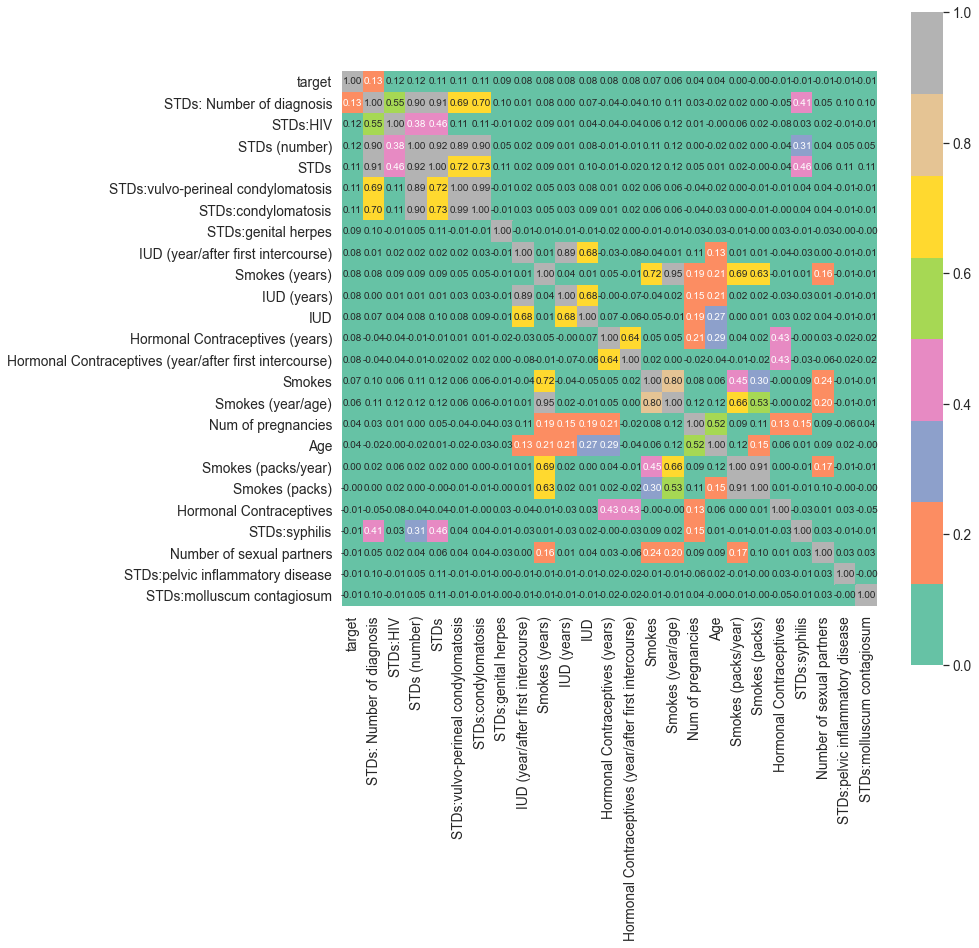

In [155]:
# Feature correlation between features and target
corrmat = df.corr()
k = 25 #number of variables for heatmap
cols = corrmat.nlargest(k,'target')['target'].index

cm = df[cols].corr()

plt.figure(figsize=(12,12))

sns.set(font_scale=1.25)
hm = sns.heatmap(cm,cmap = 'Set2', cbar=True, annot=True,vmin=0,vmax =1, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels = cols.values, xticklabels = cols.values)
plt.show()

In [133]:
# create another data set for feature selections. Drop correlated features based on above correlation heatmap
df2 = df.drop(['Dx','STDs','Smokes','IUD','Hormonal Contraceptives','STDs: Number of diagnosis',
               'Smokes (packs)','Hormonal Contraceptives (year/after first intercourse)'],axis=1)
# drop not quite understandable variables
df.drop(['Dx'],axis=1,inplace=True)
df2_target = df2['target']
df2_feature = df2.drop(['target'],axis=1)

### 2. Feature Importance

In [134]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

In [135]:
# Split train and test dataset
df_target = df['target']
X_train,X_test,y_train,y_test = train_test_split(df_feature,df_target,test_size=0.3)
df_train = pd.DataFrame(X_train)
df_test = pd.DataFrame(X_test)
df_y_train = pd.DataFrame(y_train)
df_y_test = pd.DataFrame(y_test)

In [136]:
# Categorical variables and numerical variables
num_val = ['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes (years)', 
           'Smokes (packs/year)', 'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)',
           'STDs: Number of diagnosis', 'Smokes (year/age)','Hormonal Contraceptives (year/after first intercourse)',
           'IUD (year/after first intercourse)', 'Smokes (packs)']
cal_val = [col for col in df_feature if col not in num_val]
print(cal_val)

['Smokes', 'Hormonal Contraceptives', 'IUD', 'STDs', 'STDs:condylomatosis', 'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis', 'STDs:pelvic inflammatory disease', 'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'Dx']


In [137]:
# Standardize data
scaler = StandardScaler()
df_train[num_val] = scaler.fit_transform(df_train[num_val])

### 2.1. Logistic Regression - L2 Regularization

#### Feature selection

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/anaconda3/lib/python3.7/site-packages/sk

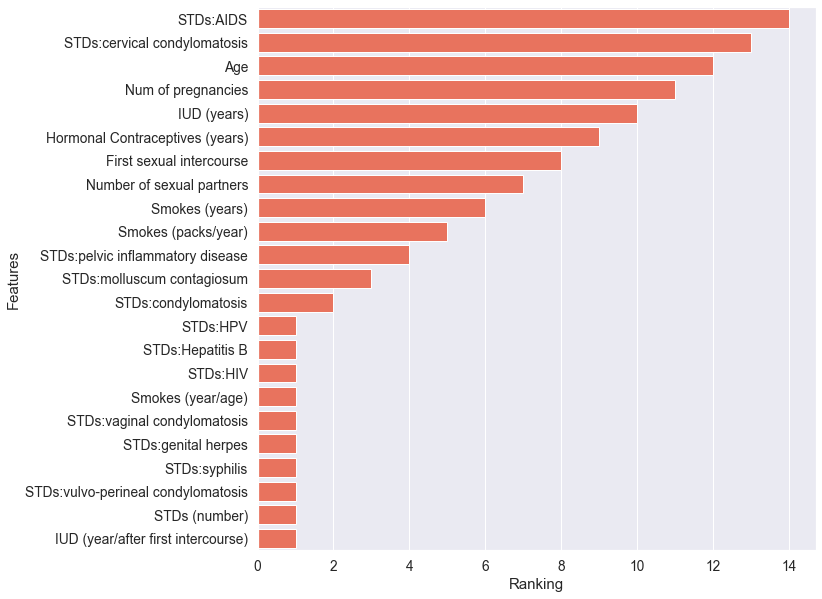

In [138]:
model = LogisticRegression('l2')
# create the RFE model and select 3 attributes
rfe = RFE(model, 10)
rfe = rfe.fit(df2_feature, df2_target)

result_lg = pd.DataFrame()
result_lg['Features'] = df2_feature.columns
result_lg ['Ranking'] = rfe.ranking_
result_lg.sort_values('Ranking', inplace=True ,ascending = False)

plt.figure(figsize=(10,10))
sns.set_color_codes("pastel")
sns.barplot(x = 'Ranking',y = 'Features', data=result_lg, color="tomato")
plt.show()

After RFE, there are 10 selected features (i.e., rank=1)

#### Logistic Regression Prediction

Accuracy:  0.8849557522123894
F1-Score: 0.3157894736842105
Sensitivity: 0.1875


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



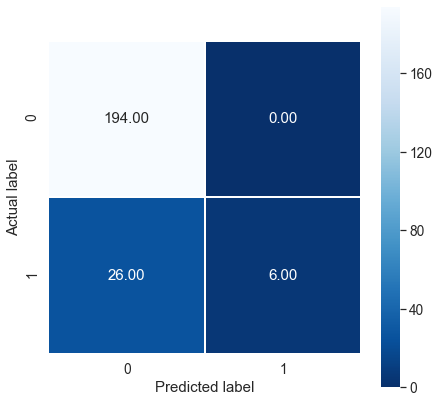

In [139]:
# performance of Logistic Regression
# Standardize data
scaler = StandardScaler()
df_test[num_val] = scaler.fit_transform(df_test[num_val])

model.fit(df_test,df_y_test)
prediction = model.predict(df_test)
score = model.score(df_test, df_y_test)
print('Accuracy: ', score)
cm = metrics.confusion_matrix(df_y_test, prediction)
f1_score = metrics.f1_score(df_y_test,prediction)
print('F1-Score:', f1_score)
recall = (cm[1][1])/(cm[1][0]+cm[1][1])
print('Sensitivity:', recall)

plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)

### 2.2. Logistic Regression - L1-Regularization

#### 2.2.1. Feature Selection

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/anaconda3/lib/python3.7/site-packages/sk

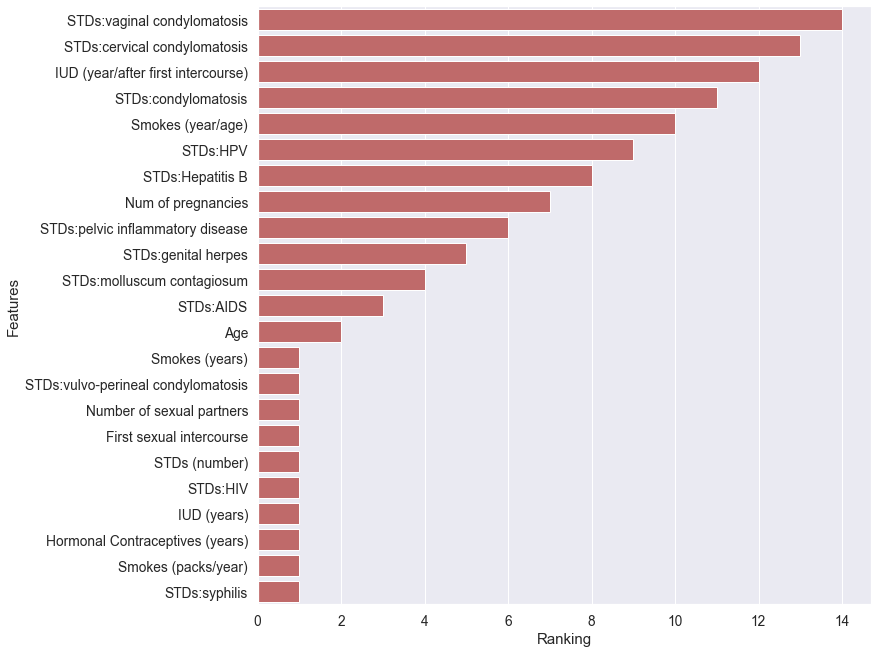

In [141]:
model = LogisticRegression('l1')
# create the RFE model and select 3 attributes
rfe = RFE(model, 10)
rfe = rfe.fit(df2_feature, df2_target)

result_lg = pd.DataFrame()
result_lg['Features'] = df2_feature.columns
result_lg ['Ranking'] = rfe.ranking_
result_lg.sort_values('Ranking', inplace=True ,ascending = False)

plt.figure(figsize=(11,11))
sns.set_color_codes("pastel")
sns.barplot(x = 'Ranking',y = 'Features', data=result_lg, color="indianred")
plt.show()

#### 2.2.2. Logistic Regression Prediction

Accuracy:  0.8805309734513275
F1-Score: 0.2702702702702703
Sensitivity: 0.15625


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



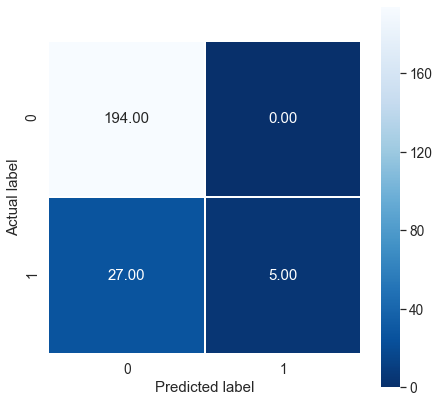

In [142]:
# performance of Logistic Regression
# Standardize data
scaler = StandardScaler()
df_test[num_val] = scaler.fit_transform(df_test[num_val])

model.fit(df_test,df_y_test)
prediction = model.predict(df_test)
score = model.score(df_test, df_y_test)
print('Accuracy: ', score)
cm = metrics.confusion_matrix(df_y_test, prediction)
f1_score = metrics.f1_score(df_y_test,prediction)
print('F1-Score:', f1_score)
recall = (cm[1][1])/(cm[1][0]+cm[1][1])
print('Sensitivity:', recall)

plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)

It is slightly better than the first model, but still has a very terrible F1-score

### 2.3. Random Forest Classification

#### 2.3.1 Feature Selection

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



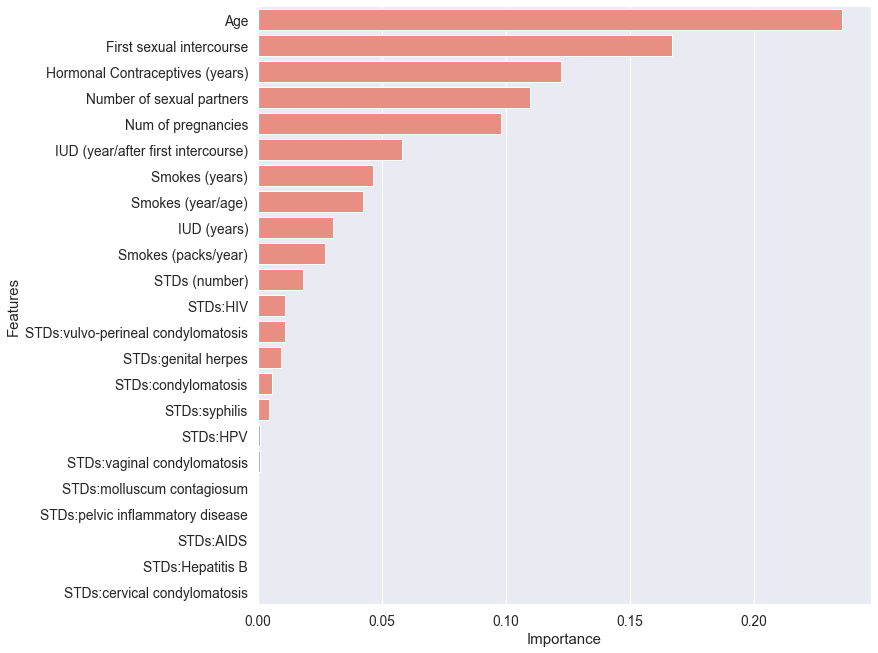

In [143]:
rf2 = RandomForestClassifier()
rf2.fit(df2_feature,df2_target)
result_rf = pd.DataFrame()
result_rf['Features'] = df2_feature.columns
result_rf ['Importance'] = rf2.feature_importances_
result_rf.sort_values('Importance',inplace=True, ascending = False)

plt.figure(figsize=(11,11))
sns.set_color_codes("pastel")
sns.barplot(x = 'Importance',y = 'Features', data=result_rf, color="salmon")
plt.show()

The above graph shows the feature importance for cervical cancer. Top 10 features include Age, first sexual intercourse, hormonal contraceptives (years), Number of sexual partners, number of pregnancies, IUD (year/after first intercourse), Smokes (years), Smokes(year/age), IUD (years), Smokes (packs/year)

#### 2.3.2. RandomForest Classification Prediction

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Accuracy:  0.9734513274336283
F1-Score: 0.896551724137931
Sensitivity: 0.8125


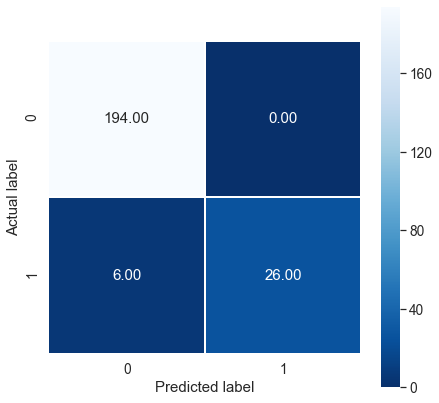

In [151]:
# performance of Logistic Regression
# Standardize data
scaler = StandardScaler()
df_test[num_val] = scaler.fit_transform(df_test[num_val])

rf = RandomForestClassifier()
rf.fit(df_train, df_y_train)

rf.fit(df_test,df_y_test)
prediction = rf.predict(df_test)
score = rf.score(df_test, df_y_test)
print('Accuracy: ', score)
cm = metrics.confusion_matrix(df_y_test, prediction)
f1_score = metrics.f1_score(df_y_test,prediction)
print('F1-Score:', f1_score)
recall = (cm[1][1])/(cm[1][0]+cm[1][1])
print('Sensitivity:', recall)

plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)

The RandomForest classification model has a accuracy of 0.97 and f1-score 0.89, and sensitivity 0.81, which is way much better than our first two models